<a href="https://colab.research.google.com/github/TwanvanDam/WP4/blob/main/Workpackage_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(4.270654687858892, 0.0004731697566926485)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


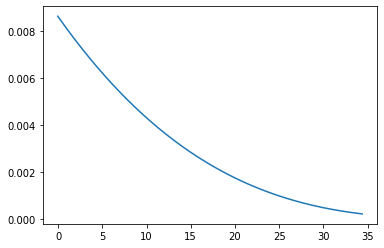

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import interpolate , integrate
kjpi
lam = 0.28
b = 68.85
cr = 9.78
dihedral = 1.56
width = 0.45
height = 0.12
t = 0.005
a = 0.001

def chord_length(y):
    c = cr - (cr*(1-lam)/(b/2))*y
    return c

def moment_inertia(y):
    w = width * chord_length(y)
    h = height * chord_length(y)
    M_outer = 1/12 * (w+t/2) * (h+t/2)**3
    M_inner = 1/12 * (w-t/2) * (h-t/2)**3
    M_stringer = a * (h/2)**2
    return  M_outer - M_inner + M_stringer

y = b/2
n = 1000

y_list = []
I_list = []


for i in range(n+1):
    y -= ((b/2)/n)
    y_list.append(y)
    i = moment_inertia(y)
    I_list.append(i)

I_cont = sp.interpolate.interp1d(y_list,I_list,kind="previous",fill_value="extrapolate")

M_cont = 10e6
E = 72e9

Integ1 = sp.integrate.quad(lambda x: (M_cont/(E*I_cont(x))),0,b/2)
print(Integ1)



plt.plot(y_list,I_list)
plt.show()
    




